# This data contains the results of an A/B test. <a href='https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/ab_edited.csv'>Download it here.</a>

## For this analysis:

### <ol><li>Check for adequate sample sizes.</li><li>Check for changes over time in results.</li><li>Formally test for a significant difference in conversions between treatment and control groups.</li></ol>

In [1]:
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt

rawdata = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/ab_edited.csv')
display(rawdata.head(), 
        rawdata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290585 entries, 0 to 290584
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.1+ MB


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


None

In [3]:
rawdata['datestamp'] = pd.DatetimeIndex(rawdata['timestamp']).date
display(rawdata.head(),
        rawdata['datestamp'].min(),
        rawdata['datestamp'].max()
        )
rawdata['daysstamp'] = pd.DatetimeIndex(rawdata['timestamp']).day
display(rawdata.head())

,user_id,timestamp,group,landing_page,converted,datestamp
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,2017-01-21
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,2017-01-12
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,2017-01-11
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,2017-01-08
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,2017-01-21


datetime.date(2017, 1, 2)

datetime.date(2017, 1, 24)

,user_id,timestamp,group,landing_page,converted,datestamp,daysstamp
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,2017-01-21,21
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,2017-01-12,12
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,2017-01-11,11
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,2017-01-08,8
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,2017-01-21,21


#### <span style="color:blue">1. From this data, we can see there are over 290,000 records. In addition, we're able to see that the entireity of this data occurs in 2017-01, so we can filter the timestamp down to just the days for a cleaner final presentation</span>

In [4]:
datacon = rawdata[rawdata['group'] == 'control']
datatre = rawdata[rawdata['group'] == 'treatment']
display(datacon.head(),
        datatre.head())

,user_id,timestamp,group,landing_page,converted,datestamp,daysstamp
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,2017-01-21,21
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,2017-01-12,12
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,2017-01-21,21
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,2017-01-10,10
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,2017-01-17,17


,user_id,timestamp,group,landing_page,converted,datestamp,daysstamp
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,2017-01-11,11
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,2017-01-08,8
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,2017-01-19,19
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,2017-01-04,4
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,2017-01-15,15


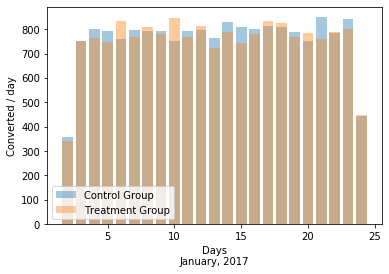

In [5]:
groupeddatacon = datacon.groupby('daysstamp')['converted'].apply(lambda x: (x==1).sum()).reset_index(name='count')
groupeddatatre = datatre.groupby('daysstamp')['converted'].apply(lambda x: (x==1).sum()).reset_index(name='count')
plt.bar(groupeddatacon['daysstamp'], groupeddatacon['count'], alpha=0.4, label='Control Group')
plt.bar(groupeddatatre['daysstamp'], groupeddatatre['count'], alpha=0.4, label='Treatment Group')
plt.xlabel('Days\nJanuary, 2017')
plt.ylabel('Converted / day')
plt.legend(loc='lower left')
plt.show()

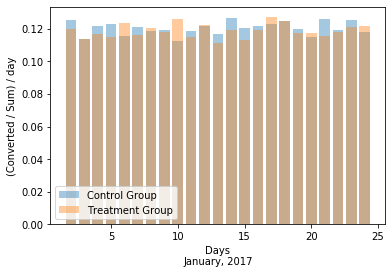

In [6]:
groupeddatacon = datacon.groupby('daysstamp')['converted'].apply(lambda x: (x==1).sum()/(x!=2).sum()).reset_index(name='ratio')
groupeddatatre = datatre.groupby('daysstamp')['converted'].apply(lambda x: (x==1).sum()/(x!=2).sum()).reset_index(name='ratio')
plt.bar(groupeddatacon['daysstamp'], groupeddatacon['ratio'], alpha=0.4, label='Control Group')
plt.bar(groupeddatatre['daysstamp'], groupeddatatre['ratio'], alpha=0.4, label='Treatment Group')
plt.xlabel('Days\nJanuary, 2017')
plt.ylabel('(Converted / Sum) / day')
plt.legend(loc='lower left')
plt.show()

#### <span style="color:blue">2. From this data, we can see there doesn't seem to be any major fluctuation day-by-day for either the control group or the treatment group.</span>

In [47]:
elist = pd.DatetimeIndex(datacon['datestamp'].unique()).sort_values(ascending=True)
dlist = elist.strftime('%m/%d/%Y')
plist = []
tlist = []
for today in elist:
    todaydatacon = datacon[datacon['datestamp'] == today]
    todaydatatre = datatre[datatre['datestamp'] == today]
    t, p = st.ttest_ind(todaydatacon['converted'], todaydatatre['converted'])
    plist.append(p)
    tlist.append(t)

resultsdf = pd.DataFrame(list(zip(dlist, tlist, plist)), columns=['Date', 'T-test Stat', 'T-test P'])
resultsdf['P < 0.05'] = resultsdf['T-test P'] < 0.05
resultsdf

,Date,T-test Stat,T-test P,P < 0.05
0,01/02/2017,0.655740,0.512018,False
1,01/03/2017,0.005103,0.995929,False
2,01/04/2017,0.931564,0.351579,False
3,01/05/2017,1.446826,0.147970,False
4,01/06/2017,-1.445201,0.148425,False
5,01/07/2017,0.850056,0.395309,False
6,01/08/2017,-0.331119,0.740560,False
7,01/09/2017,0.280713,0.778935,False
8,01/10/2017,-2.399952,0.016411,True
9,01/11/2017,0.679502,0.496831,False


#### <span style='color:blue'>Of the 23 days for which we have results, there was only one instance where P was less than 0.05. However, the overwhelming trend throughout the month, was the opposite.  Therefore we Accept the Null Hypothesis that there is no significant difference in the means.</span>